In [9]:
from textblob import TextBlob #textblob will give you sentiment polarity from -1(means the sentence is extremely -ve) to 1( extremely +ve) and 0 means neutral
import sys, tweepy
import matplotlib.pyplot as plt
%matplotlib inline
from tweepy import OAuthHandler 

def percentage(part, whole):
	return 100 * float(part)/float(whole) 

#establish connection with twitter api
consumerKey = "KtwCIzAtncJsfh843giBom9Hc"
consumerSecret = "JRrT2MqRnqm3F2CxSphgzDNgDVlY2O6McCqvfOd5f10foCLGvM"
accessToken = "1159011338309423104-4q16RCM8pREhK7BwA5iIYk2sqzX2XX"
accessTokenSecret = "JIPcptzrDzf6oeIwrtT8F9bnQNlaTtj6vkRuuCd80IWuF"

auth = tweepy.OAuthHandler(consumerKey,consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(auth) #creating a object for API	
#upto here we have successfully establish the connection with the API
searchTerm = input("Enter keyword/hashtag to search about: ")
noOfSearchTerms = int(input("Enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q = searchTerm , lang = "en").items(noOfSearchTerms)



Enter keyword/hashtag to search about: bitcoin
Enter how many tweets to analyze: 100


How people are reacting onbitcoinby analyzing100Tweets.
positive


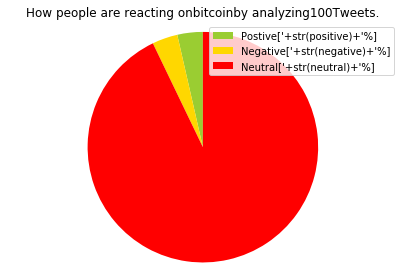

In [10]:
positive = 0
negative = 0
neutral = 0
polarity = 0 #this will be the average result of all the tweets

for tweet in tweets:
	#print(tweet.text)
	analysis = TextBlob(tweet.text) #tweet.text is used to print the text
	polarity += analysis.sentiment.polarity

	if (analysis.sentiment.polarity == 0):
		neutral += 1

	elif (analysis.sentiment.polarity == 1):
		positive +=1

	elif (analysis.sentiment.polarity == -1):
		negative +=1
positive = percentage(positive,noOfSearchTerms)
negative = percentage(negative,noOfSearchTerms)
neutral = percentage(neutral,noOfSearchTerms)
polarity = percentage(polarity,noOfSearchTerms)


positive = format(positive, '.2f') #getting the percentage upto two decimal points
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

#printing the average result
print("How people are reacting on" + searchTerm + "by analyzing" + str(noOfSearchTerms) + "Tweets.")

if (polarity == 0):
    print("neutral")
elif (polarity > 0.00):
    print("positive")
elif (polarity < 0.00):
    print("negative")  

#creating pie chart

labels = ["Postive['+str(positive)+'%]" ,"Negative['+str(negative)+'%]" ,"Neutral['+str(neutral)+'%]" ]
sizes = [positive,negative,neutral]
colors = ['yellowgreen','gold','red']
patches , text = plt.pie(sizes, colors=colors,startangle=90)
plt.legend(patches,labels,loc='best')
plt.title("How people are reacting on" + searchTerm + "by analyzing" + str(noOfSearchTerms) + "Tweets.")
plt.axis('equal')
plt.tight_layout()
